# Time Series Data Analysis Project


In [49]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
# read the data
df = pd.read_csv('AirPassangers.csv')
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


# Data Pre-processing


In [51]:
# changes the names of columns
df.columns = ["Date", "Number of Passengers"]
df.head()

,Date,Number of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


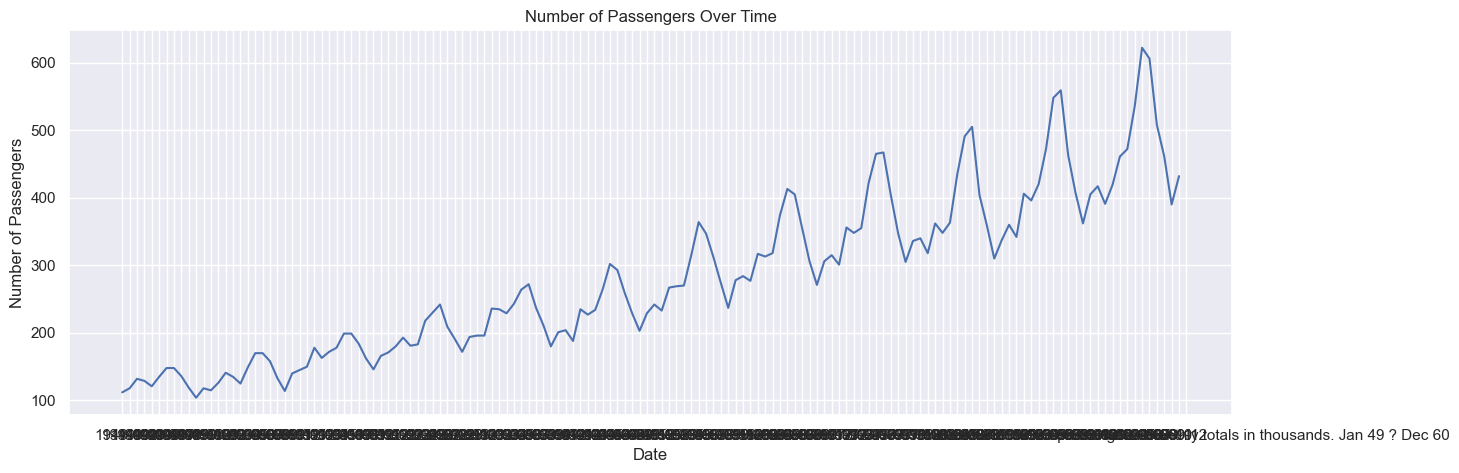

In [52]:
# create the line plot
sns.lineplot(x="Date" ,y="Number of Passengers", data=df)
# set the labels
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Over Time")
# Show the plot
plt.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

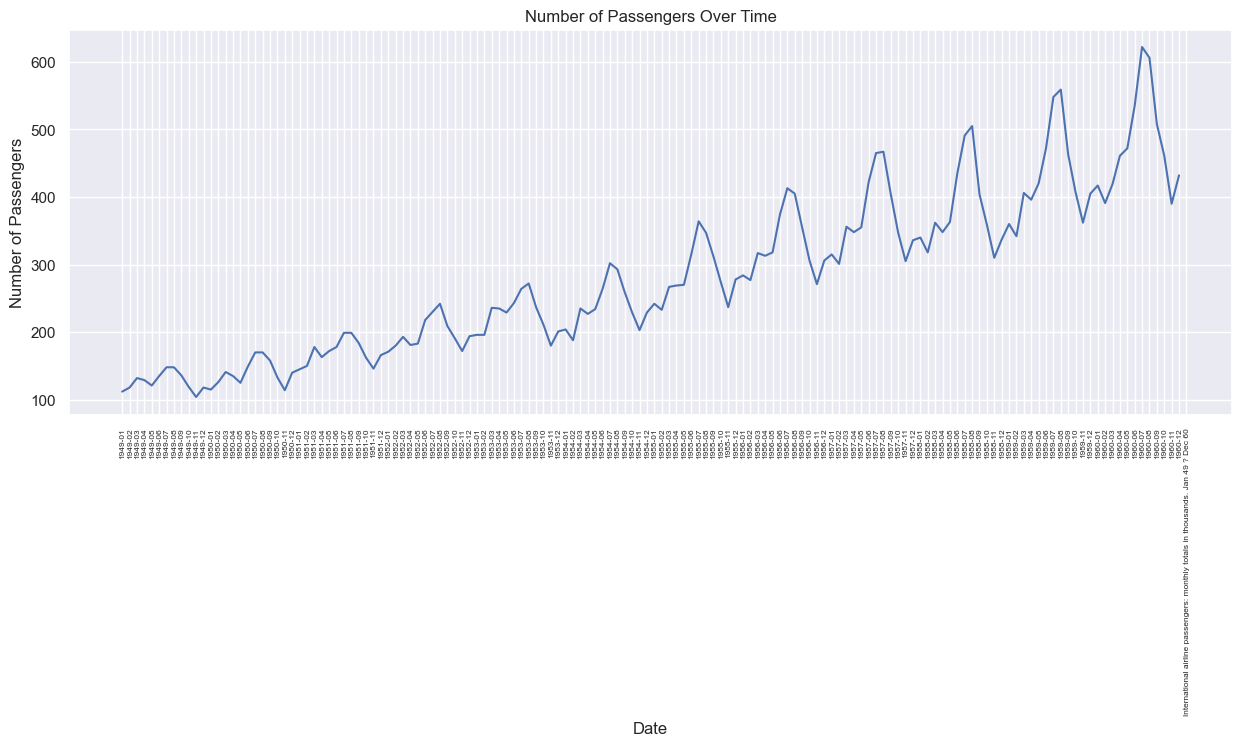

In [53]:
# plot the data using sns
sns.set(rc={'figure.figsize':(15, 5)}) # set the figure size
sns.lineplot(x = "Date", y = "Number of Passengers",  data = df)
# set the labels
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Over Time")
#rotate x-axis ticks
plt.xticks(rotation=90, fontsize=6)

# make same plot using plotly
import plotly.express as px
fig = px.line(df, x="Date", y="Number of Passengers", title='Number of Passengers Over Time')
# change color of line
fig.update_traces(line_color='red')
fig.show()

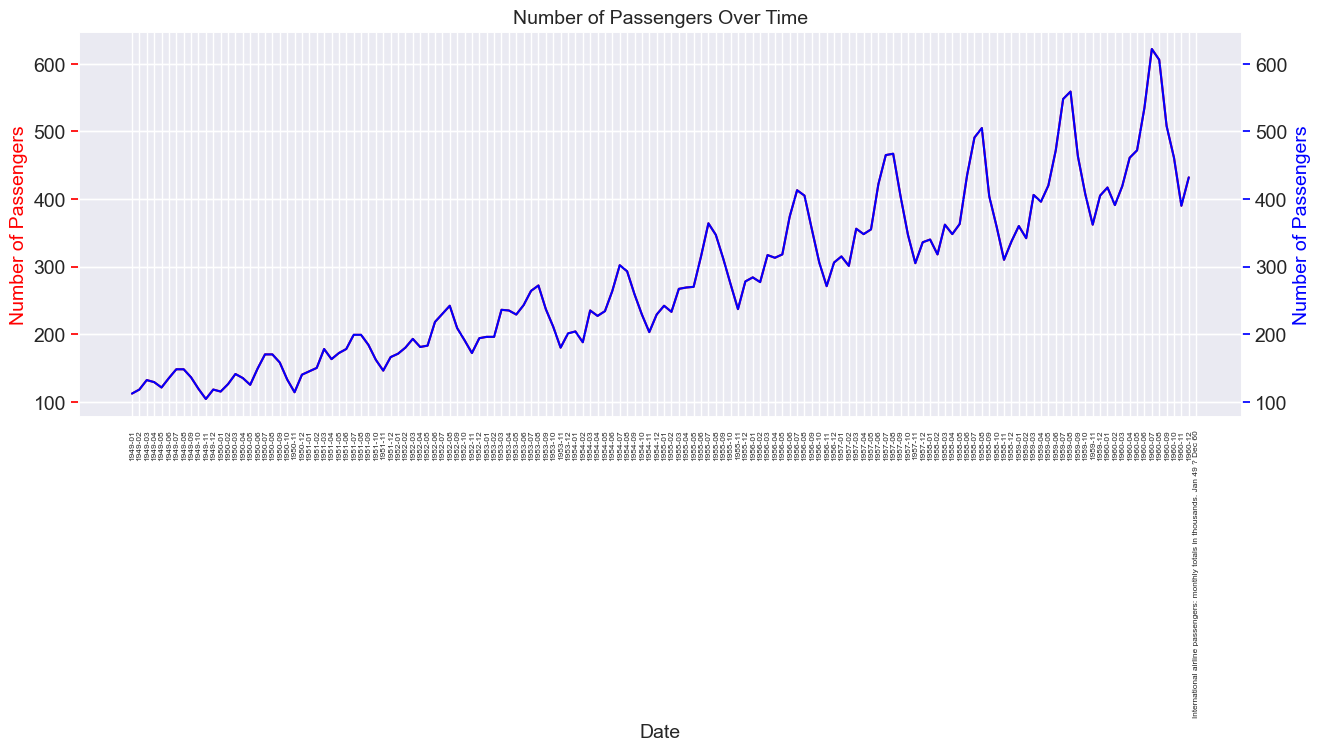

In [ ]:
# make two sided plot using matplotlib
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df["Date"], df["Number of Passengers"], color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Number of Passengers",color="red",fontsize=14)
ax.set_title("Number of Passengers Over Time",fontsize=14)
ax.tick_params(axis="y",color="red",labelsize=14)
ax.tick_params(axis="x",labelsize=6, rotation=90)
ax2=ax.twinx()
ax2.plot(df["Date"], df["Number of Passengers"],color="blue")
ax2.set_ylabel("Number of Passengers",color="blue",fontsize=14)
ax2.tick_params(axis="y",color="blue",labelsize=14)
plt.show()

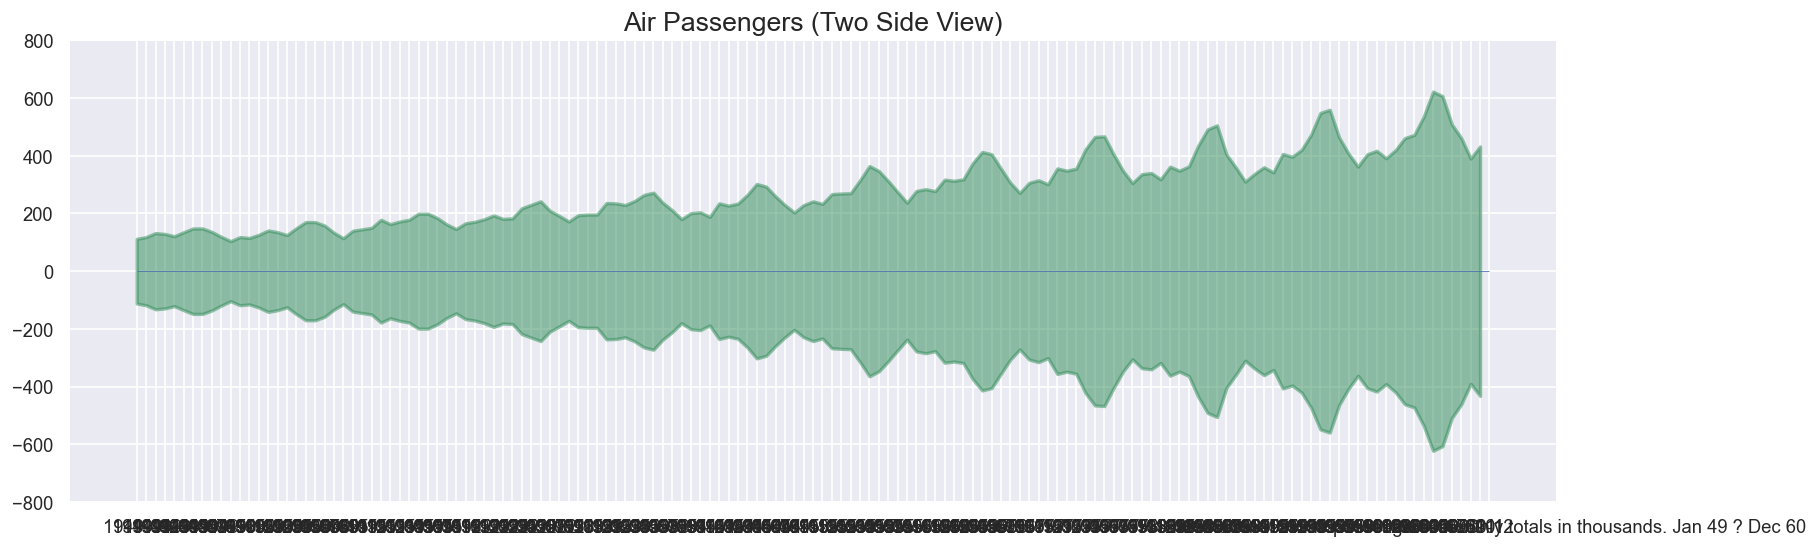

In [ ]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

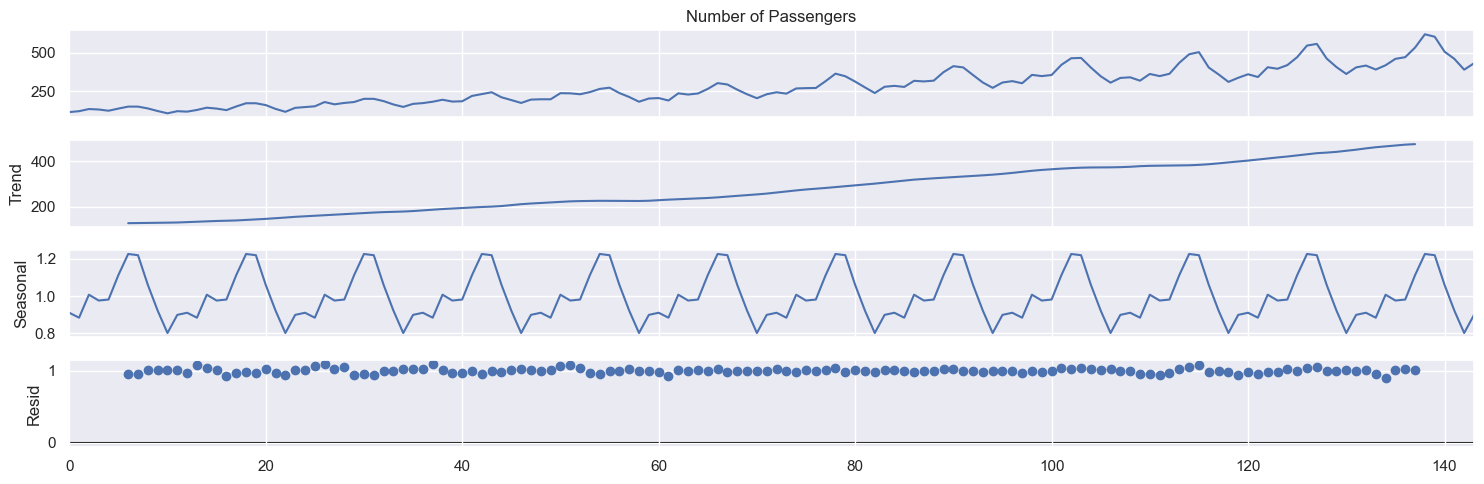

In [60]:
# Remove missing values from the 'Passengers' column
df = df.dropna(subset=['Number of Passengers'])

# Decompose the data
decompose = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)

# Plot the decomposition
decompose.plot()

# plot the observed data
fig = px.line(decompose.observed, x=decompose.observed.index, y=decompose.observed.values, title='Observed')

# display the plot
fig.show()

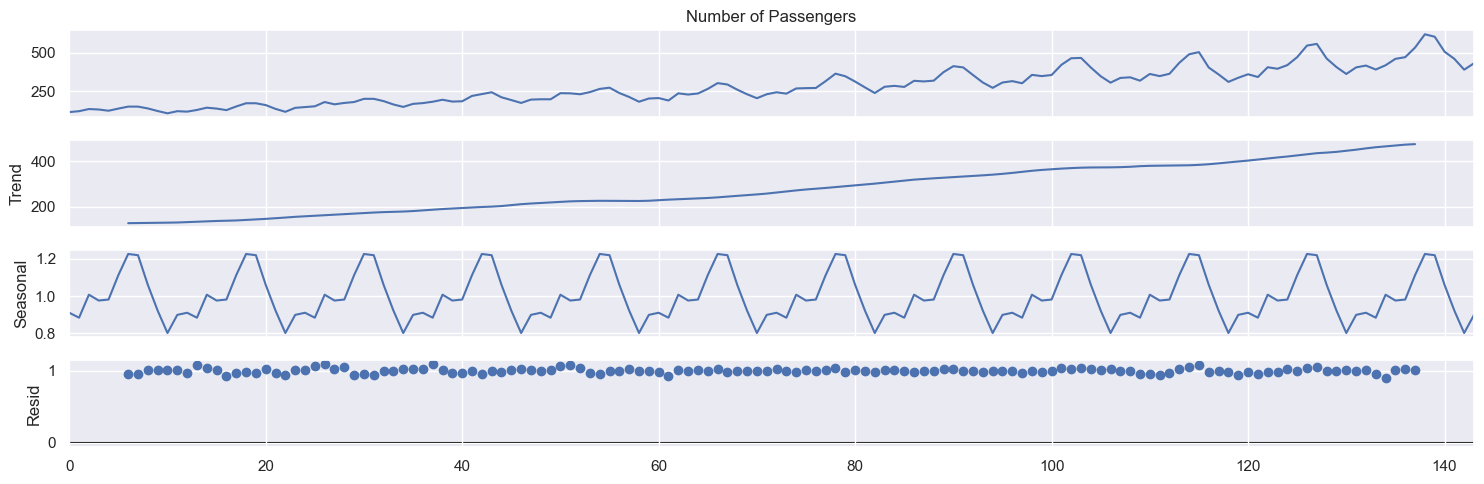

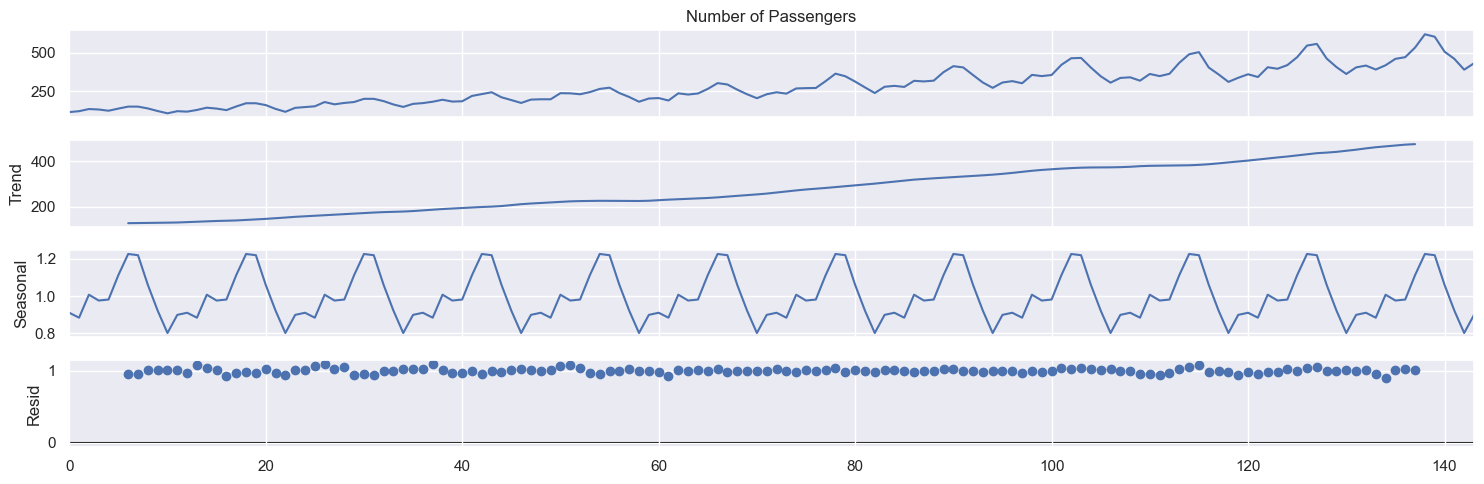

In [58]:
# Remove missing values from the 'Passengers' column
df = df.dropna(subset=['Number of Passengers'])

# Decompose the data
decompose = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)

# Plot the decomposition
decompose.plot()